## **Segmentation of Credit Card Users in Python**

#### **Unsupervised Learning** 

**Atribution** https://github.com/muhammetbektas 

#### **1. Introduction**

Unlike Supervised Learning, Unsupervised learning has only independent variables and no corresponding target variable. Shortly, the data is unlabeled.

The aim of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

We are going to aim to cluster a data set that is about behaviour of the customers having credit card.

**How many clusters can we distinguish the customers according to theirs transactions or behaviours ?**



#### **General View of Data**

The data set has 8950 transactions or informations about account that belong to customers.

**Features**

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONE OFF PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS PURCHASES : Amount of purchase done in installment

CASH ADVANCE : Cash in advance given by the user

PURCHASES FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONE OFF PURCHASES FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES INSTALLMENTS FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH ADVANCE FREQUENCY : How frequently the cash in advance being paid

CASH ADVANCE TRX : Number of Transactions made with "Cash in Advanced"

PURCHASES TRX : Number of purchase transactions made

CREDIT LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM PAYMENTS : Minimum amount of payments made by user

PRC FULL PAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print('This data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

This data set has 8950 rows and 18 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### **Data Cleaning and EDA**

Hur ser vårt data ut?

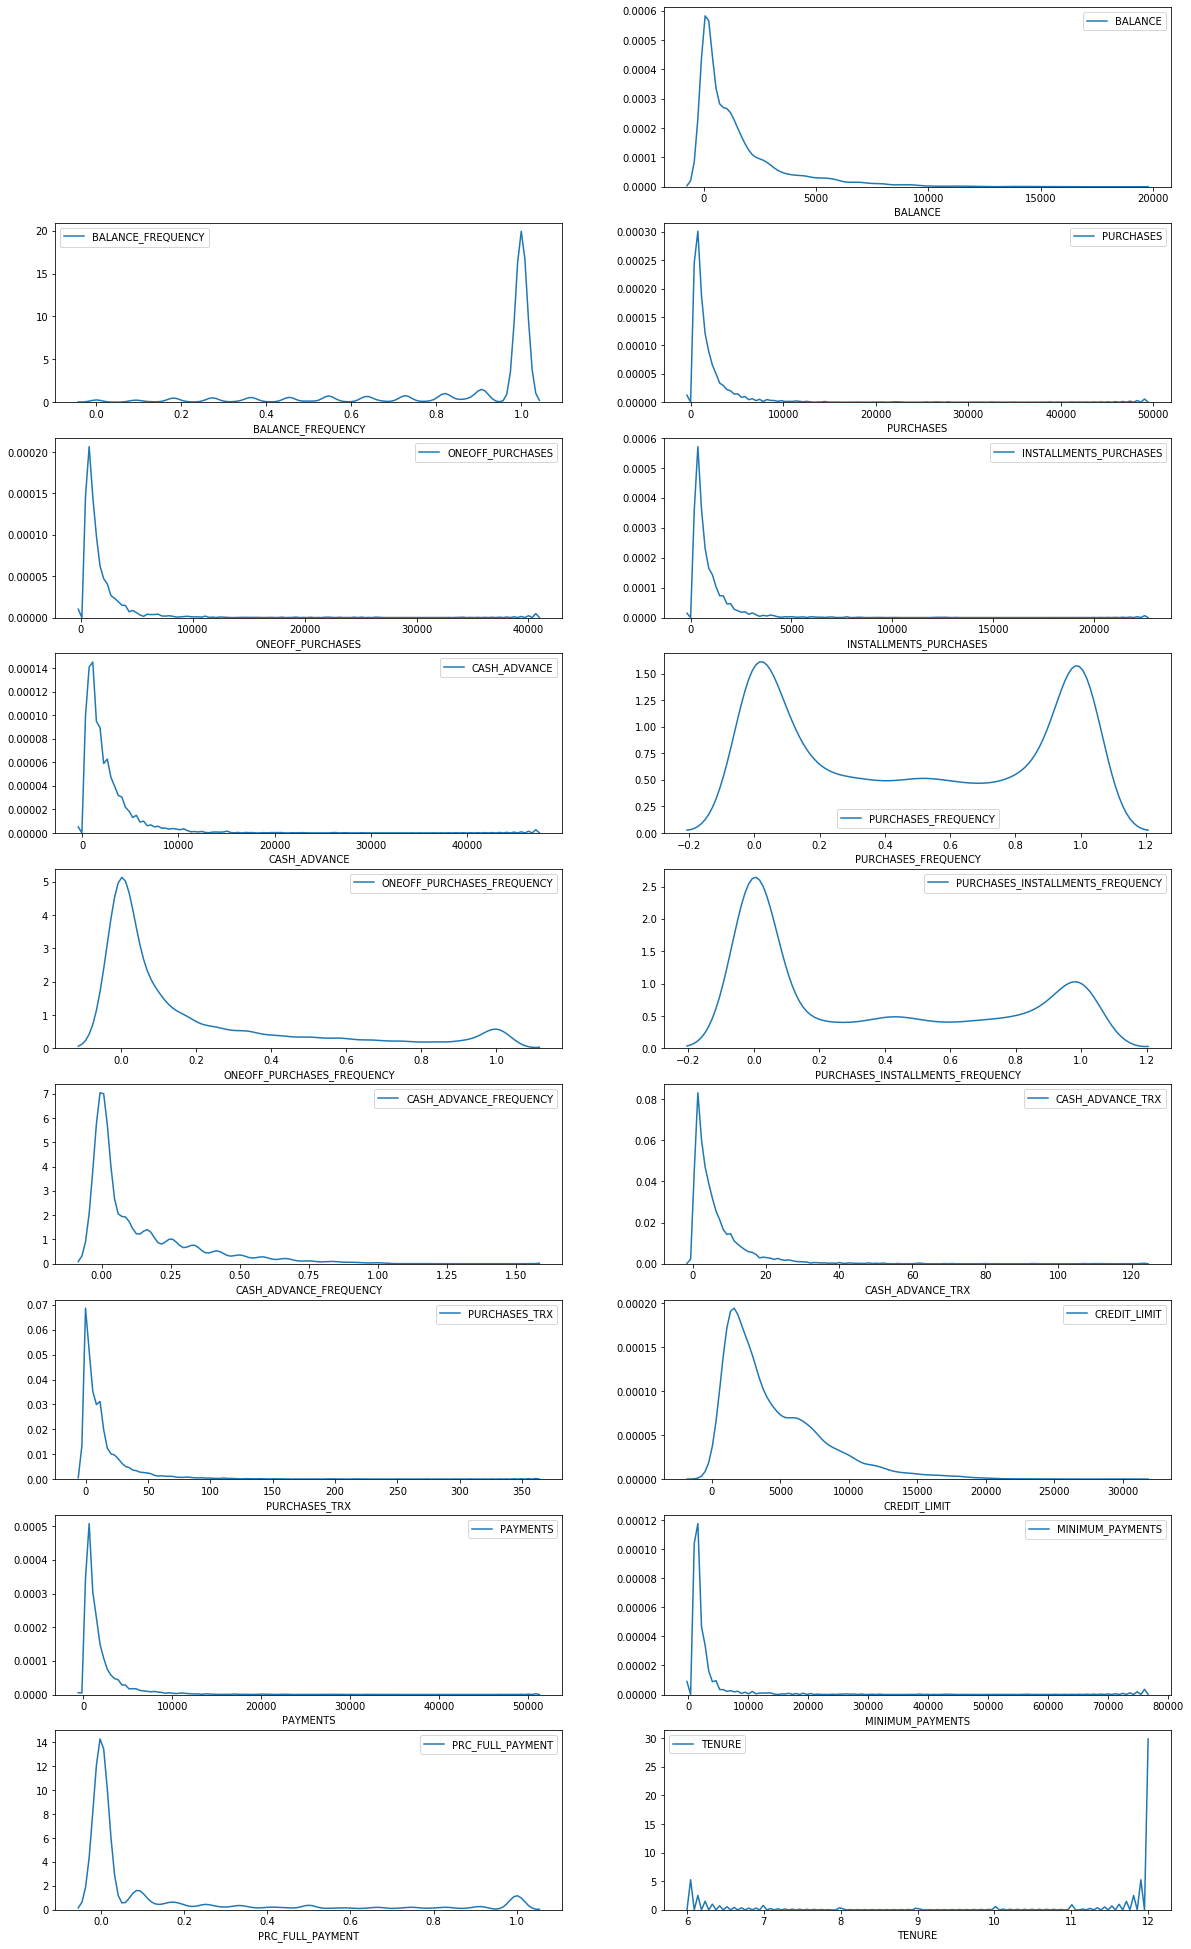

In [5]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

There is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do very high amount of transactions. How to handle outliers depends on what type of clustering we want to perform. Outliers could for instance be part of another cluster of anomaly?

In [6]:
#Inspektion av outliers, antal datapunkterr som ligger utanför de understa och översta kvantilerna.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
CASH_ADVANCE                        1030
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
CREDIT_LIMIT                         248
CUST_ID                                0
INSTALLMENTS_PURCHASES               867
MINIMUM_PAYMENTS                     841
ONEOFF_PURCHASES                    1013
ONEOFF_PURCHASES_FREQUENCY           782
PAYMENTS                             808
PRC_FULL_PAYMENT                    1474
PURCHASES                            808
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_TRX                        766
TENURE                              1366
dtype: int64

**Missing values**


In [7]:
def null_values(df):
    nv=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1


Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.


In [8]:
df.drop(['CUST_ID'], axis=1, inplace=True)


We have seen that credit limit feature has just 0.01% of records having Nan value i.e just 1 record here has missing value. So we don't have to take the trouble to impute it. We can simply drop it and never think about it again.

In [9]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

For imputing minimum payments feature, no column seem to have any relations with this feature and help us estimate values for missing records. It seems that the values are missing at random and we can simply use median to replace the Nan values since the distribution for minimum payments is skewed and hence median gives a better estimation of the central tendency of this feature.


In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

As we saw earlier our data i skewed, this is not compatible with k-means that requires normalized and standardized data in order to perform well

In [11]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

In [12]:
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

In [13]:
# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

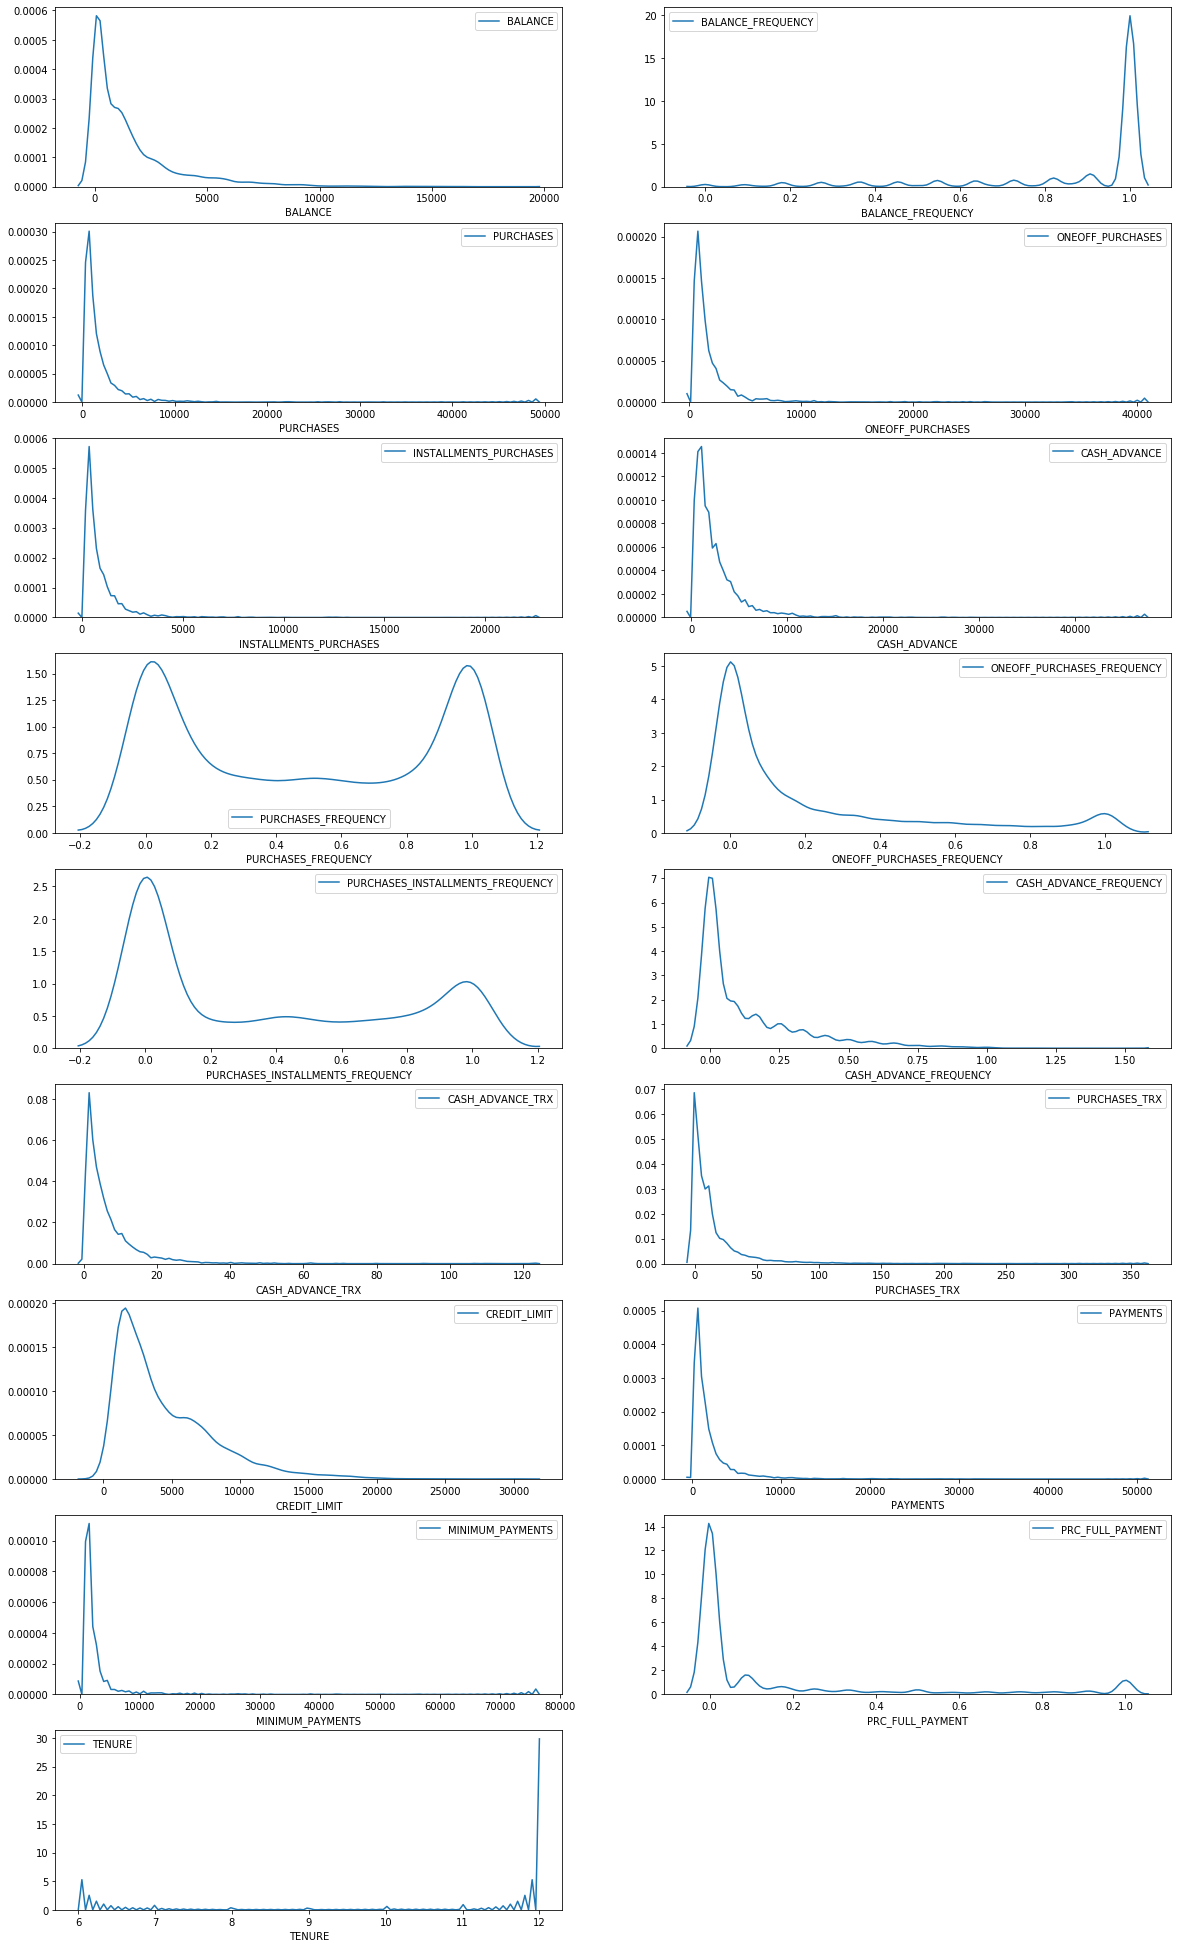

In [14]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

**K-Means Clustering**

**Number of clusters** 

To figure out the number of clusters that can be found out in our datasets, we can evaluate a set of indices or scores.
> * Elbow method
>
> * Silhoutte score
>
> * Davies Bouldin score

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_metrics(df, min_clust=2, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))
        db_score.append(davies_bouldin_score(df, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

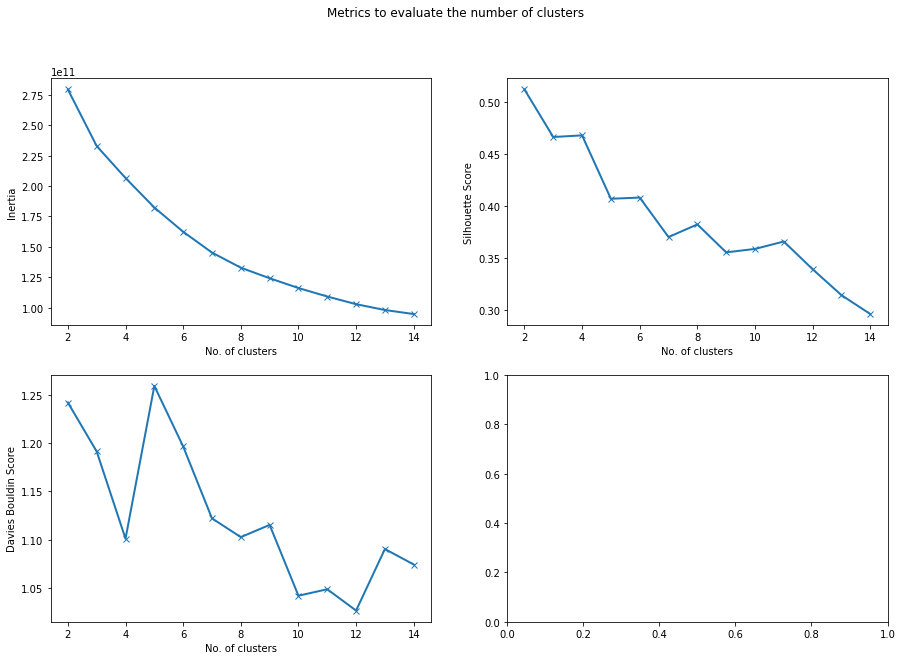

In [25]:
evaluate_metrics(df.iloc[:, :-2], min_clust=2, max_clust=15, rand_state=0)

In [ ]:
#Only elbow method
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=43)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

The values of silhouette score are close to each other in range 6 to 8. In the circumstances, Let's look at the another metric. The metric is Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [ ]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin is ususally considered better the lower the measure, while silouette score should be as high as possible. Which is the most appropriate number of clusters?

In [ ]:
kmeans_labels=KMeans(n_clusters=7,random_state=43).fit_predict(df_norm)

In [ ]:
df['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

In [ ]:
means=pd.DataFrame(df.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

In [ ]:
df.set_index('Clusters')
grouped=df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,6,8,9,11,12,16]]

In [ ]:
features=["BALANCE","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","TENURE"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

We have choosen some columns that are significant to identify the clusters.


Cluster 0 : The highest purchase frequency which tend to pay in installment, that is higher credit limit and long duration customers.

Cluster 1 : Pretty low balance and purchase frequency. They rarely use credit card and also they have lower credit limit.

Cluster 2 : This group is having the highest amount of customers and lowest usage of cards. Inactive customers, also long duration customers.

Cluster 3 : High tendency of payment installment, higher purchase frequency and their tenure time is above avarage.

Cluster 4 : The highest balance amount but purchase frequency is not that good. Tend to cash in advance, higher credit limit than others. They don’t like spending money.

Cluster 5 : Second highest purchase frequency and also higher tendency payment in installment. They are long duration customers.

Cluster 6 : The least quantity of customer is in this group which are below avarage of purchase frequency and a shortly duration customers.
